In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('cardekho_data.csv')
columns = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df = df[columns]
df = df.drop(['Car_Name','Seller_Type','Owner'], axis = 1)
encode = ['Fuel_Type', 'Transmission']
label_encoder = LabelEncoder()
for col in encode:
    df[col] = label_encoder.fit_transform(df[col])
df = df.dropna()
columns_to_normalize = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Transmission', 'Year']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
features = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Transmission', 'Year']

X = df[features]
y = df['Fuel_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(64, activation = 'LeakyReLU'))
model.add(Dense(32, activation = 'LeakyReLU'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 16, validation_split = 0.2, verbose = 1)

Epoch 1/50
12/12 [==============================] - 1s 31ms/step - loss: 1.9440 - accuracy: 0.7292 - val_loss: 1.6069 - val_accuracy: 0.7500
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 1.2615 - accuracy: 0.8177 - val_loss: 0.9152 - val_accuracy: 0.7500
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7046 - accuracy: 0.8177 - val_loss: 0.7127 - val_accuracy: 0.7500
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.5868 - accuracy: 0.8177 - val_loss: 0.6052 - val_accuracy: 0.7500
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.5337 - accuracy: 0.8177 - val_loss: 0.5543 - val_accuracy: 0.7500
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5223 - accuracy: 0.8177 - val_loss: 0.5371 - val_accuracy: 0.7500
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.5060 - accuracy: 0.8177 - val_loss: 0.5223 - val_accuracy: 0.7500
Epoch 8/50
12/12 [=

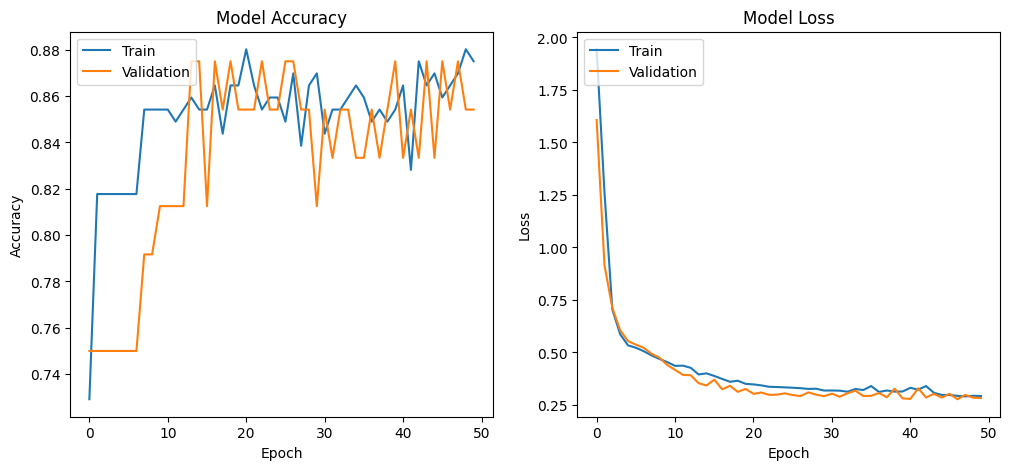

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

2/2 [==============================] - 0s 3ms/step


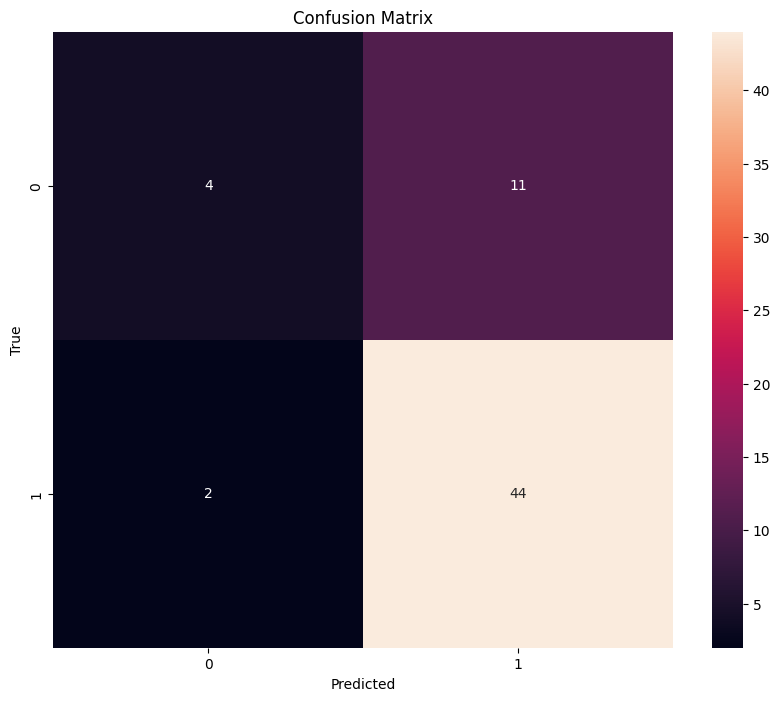

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from tensorflow import keras
import numpy  as np
from keras import layers, models
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam,SGD,RMSprop
from tensorflow.keras.utils import to_categorical

# load data 


data_dir = "tom_and_jerry/tom_and_jerry"
(img_height, img_width) = 224,224
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
  data_dir,
  (img_height, img_width),
  color_mode='grayscale',
  subset="training",
  batch_size=32,
  shuffle=True)

test_data = datagen.flow_from_directory(
  data_dir,
   (img_height, img_width),
  subset="validation",
  color_mode='grayscale',
  batch_size=32)

Found 2536 images belonging to 2 classes.
Found 634 images belonging to 2 classes.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding="same", activation='relu',
                        input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))



model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(256, (3,3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512, (3,3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 batch_normalization_15 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_16 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                      

In [21]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.n//train_data.batch_size,
    epochs=20,
    validation_data=test_data,
    validation_steps=test_data.n//test_data.batch_size)


model.save("tj.h5")

Epoch 1/20
79/79 [==============================] - 737s 9s/step - loss: 0.6798 - accuracy: 0.6821 - val_loss: 1.9531 - val_accuracy: 0.3997
Epoch 2/20
79/79 [==============================] - 739s 9s/step - loss: 0.5441 - accuracy: 0.7456 - val_loss: 1.6325 - val_accuracy: 0.3882
Epoch 3/20
79/79 [==============================] - 735s 9s/step - loss: 0.4888 - accuracy: 0.7728 - val_loss: 2.6262 - val_accuracy: 0.3964
Epoch 4/20
79/79 [==============================] - 745s 9s/step - loss: 0.4504 - accuracy: 0.8019 - val_loss: 4.3887 - val_accuracy: 0.3882
Epoch 5/20
79/79 [==============================] - 753s 10s/step - loss: 0.3956 - accuracy: 0.8315 - val_loss: 2.7115 - val_accuracy: 0.3997
Epoch 6/20
79/79 [==============================] - 751s 10s/step - loss: 0.3793 - accuracy: 0.8395 - val_loss: 2.8351 - val_accuracy: 0.3882
Epoch 7/20
79/79 [==============================] - 763s 10s/step - loss: 0.3456 - accuracy: 0.8646 - val_loss: 2.3272 - val_accuracy: 0.3980
Epoch 8/20

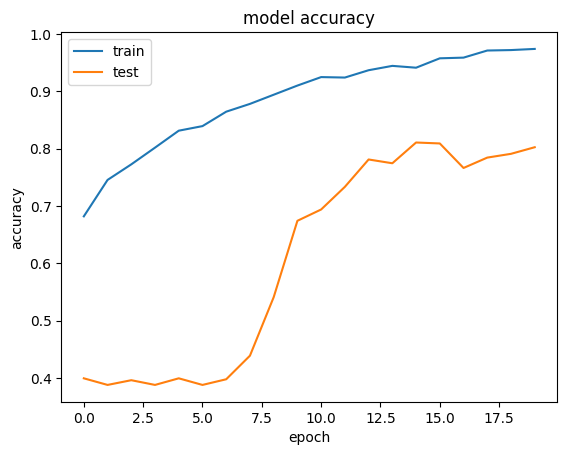

In [22]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()